## Import module

In [34]:
#import module 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm ,tree
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ClassificationReport

plt.rcParams.update({'font.size': 25})


# load data into file 

In [30]:
#load data into CSV file 
df = pd.read_csv("/content/data.csv",index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [31]:
#fetch the dimensions
df.shape

(863, 14)

## `divide data into train and test split


In [32]:
x= df.iloc[:,:-1]
y= df[['result']]
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 5, train_size=0.85,shuffle = True)

In [33]:
x.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [8]:
x_train.shape

(733, 13)

In [9]:
y_train.shape

(733, 1)

In [10]:
x_test.shape

(130, 13)

In [11]:
y_test.shape

(130, 1)

#Data Visualizion

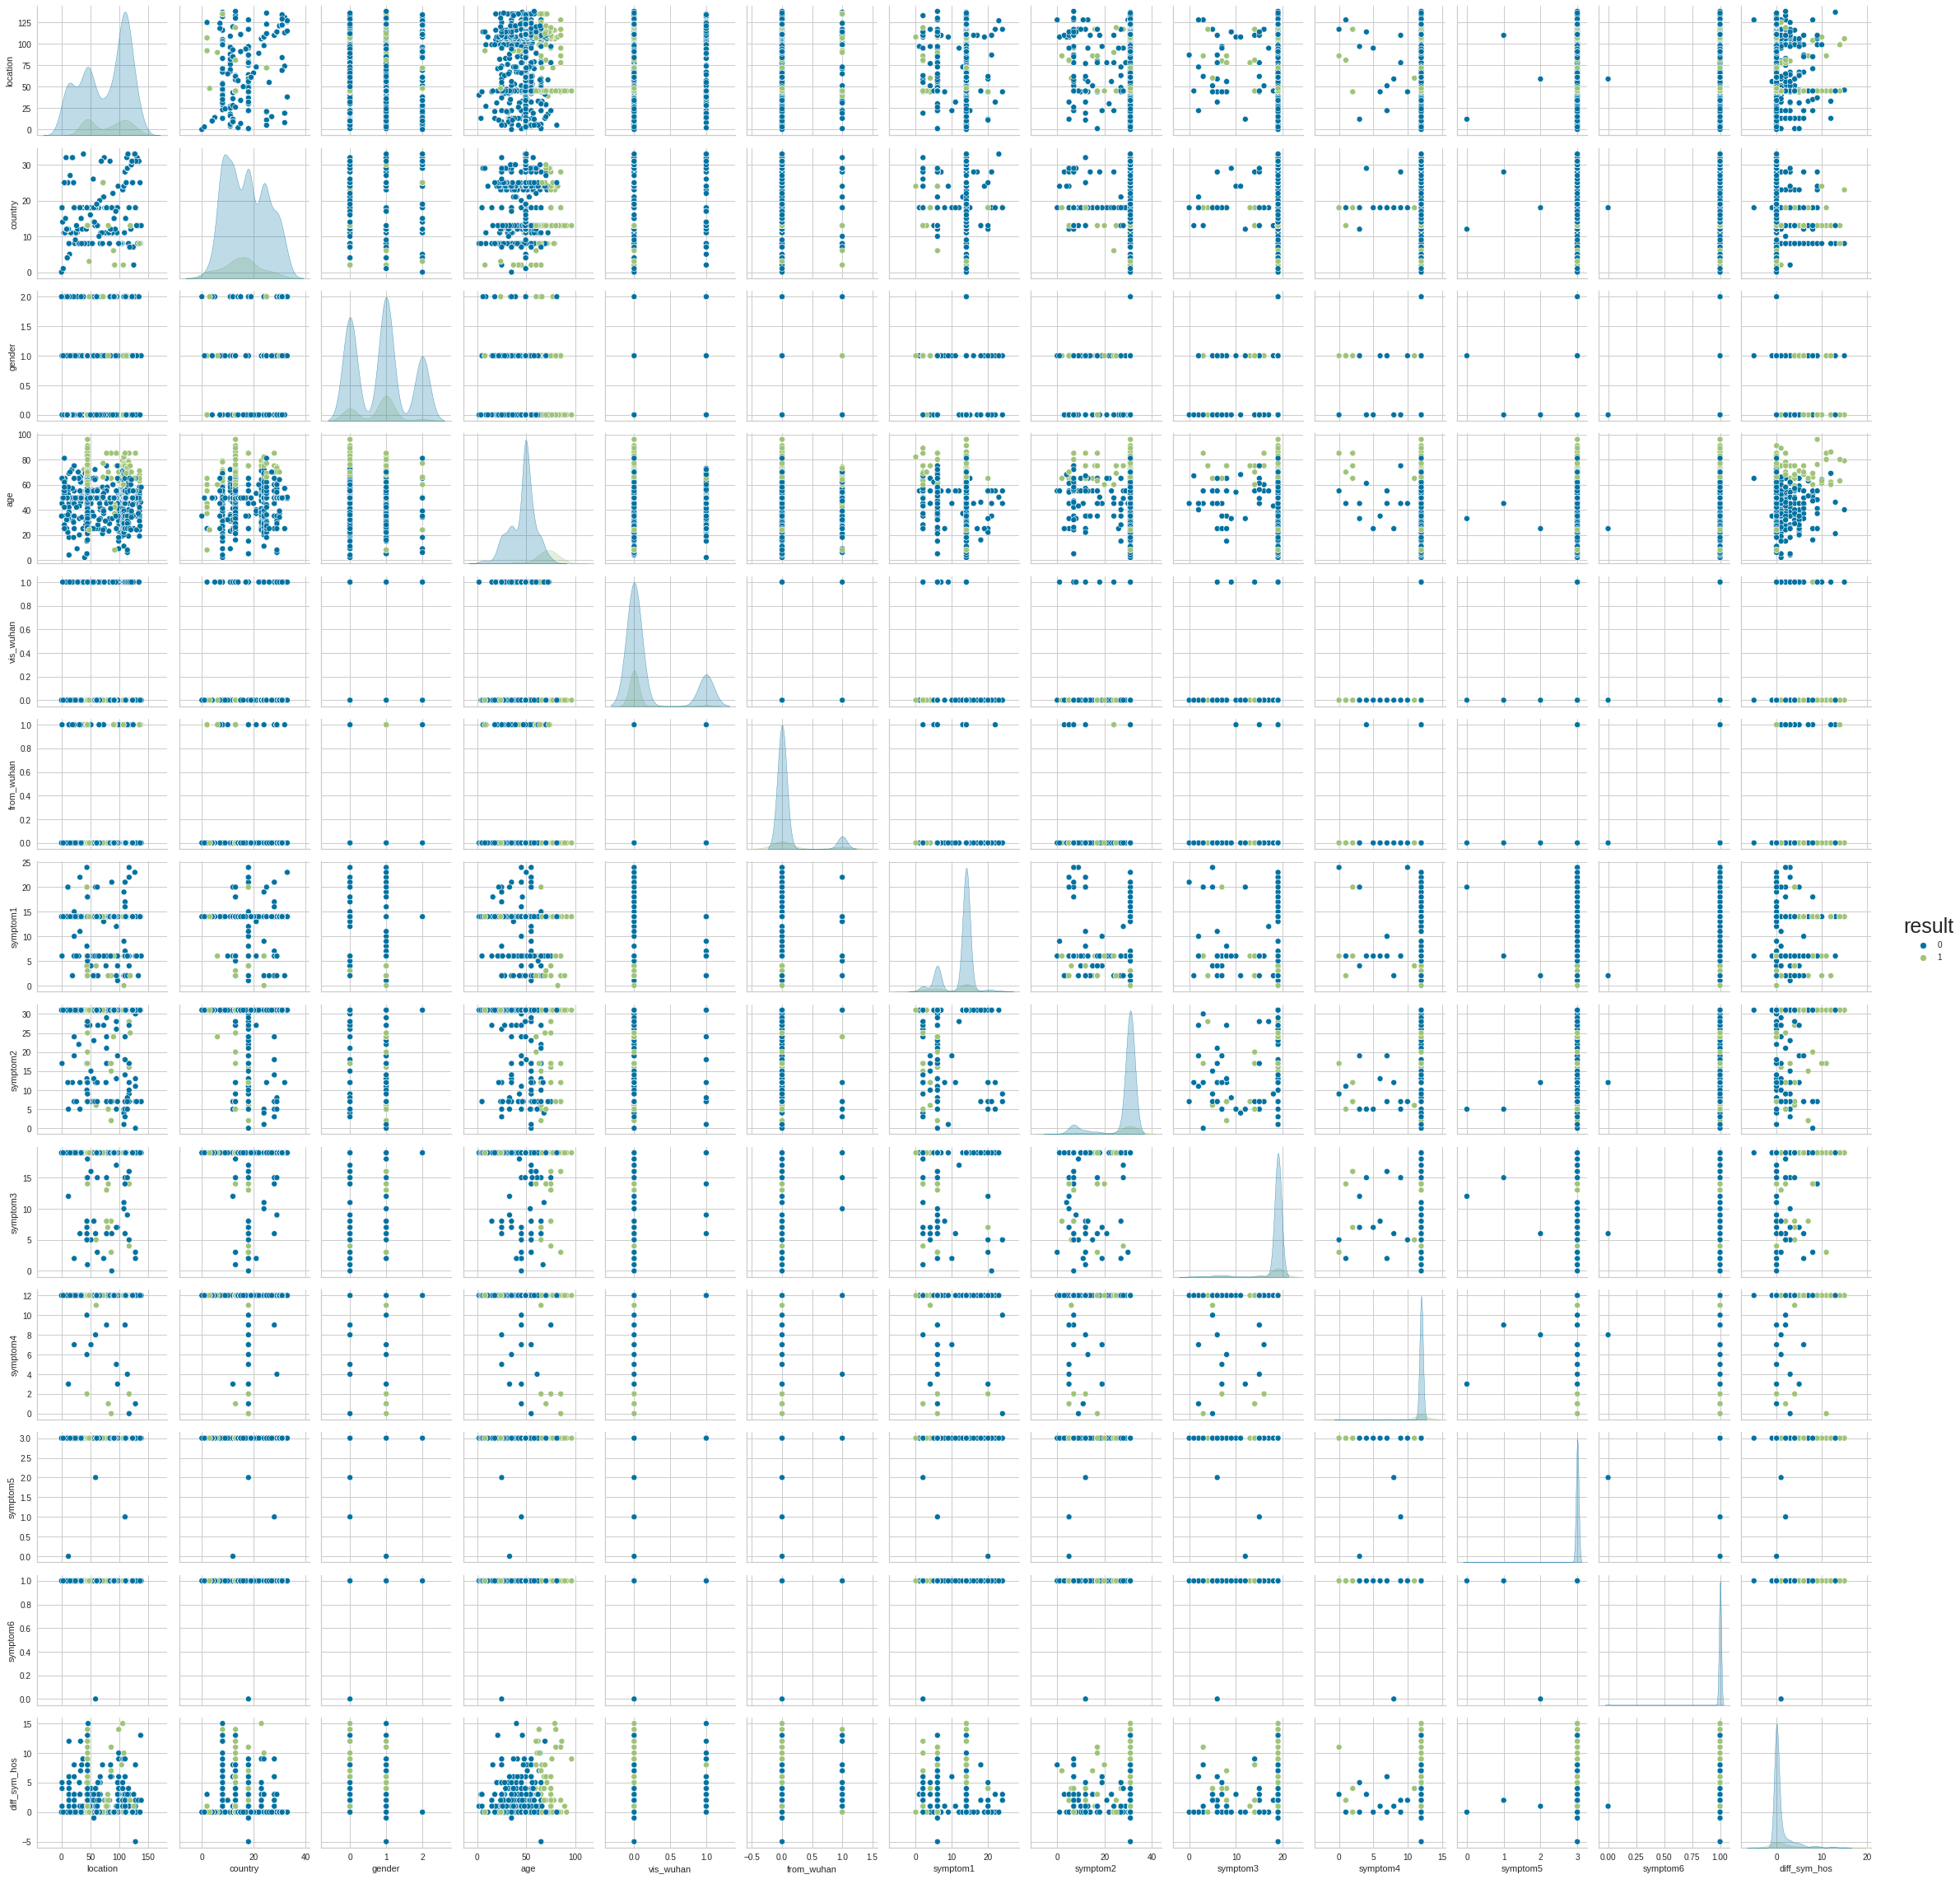

In [35]:
sns.pairplot(data=df,hue='result')


<AxesSubplot:xlabel='gender', ylabel='result'>

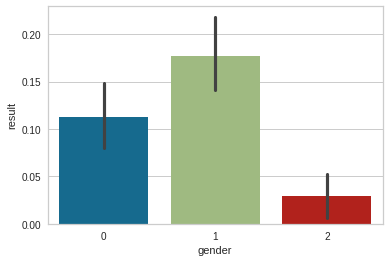

In [36]:
sns.barplot(y=df.result, x=df.gender)


Text(0.5, 1.0, 'Correlation Matrix')

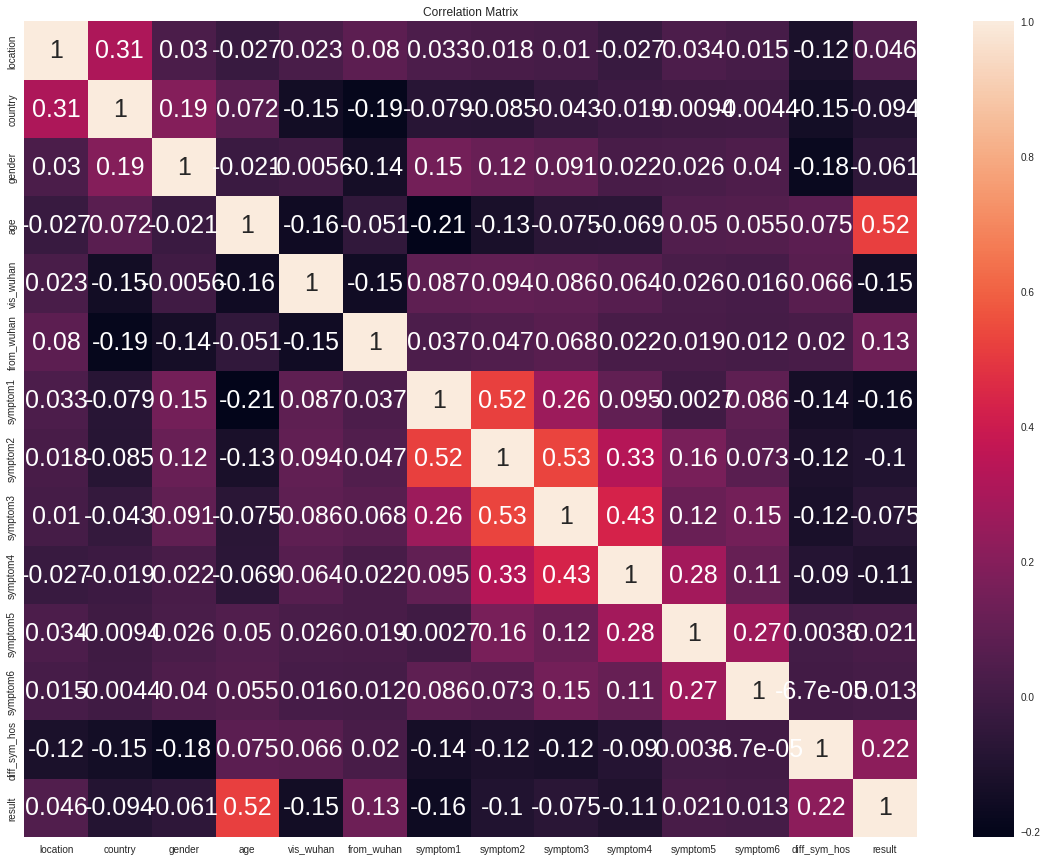

In [37]:
plt.rcParams["figure.figsize"] = (20,15) 
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

# Normalize data

In [38]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## 1. K-Nearest Neighbors

In [39]:
#build KNN classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = np.random.randint(1 , 10), metric = 'minkowski', p = 2)

#grid search to find the best hyperparameters for KNN classifer
n_neighbors_paras = {'weights': ['uniform', 'distance'],'algorithm':['auto'],'n_neighbors':list(range(1, 10))}
GridSearch_classifier = GridSearchCV(KNN_classifier, n_neighbors_paras, cv=5)

#train KNN classifier
GridSearch_classifier.fit(x_train, np.ravel(y_train))



GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [40]:
GridSearch_classifier.best_score_


0.9358680458484765

In [41]:
GridSearch_classifier.best_estimator_


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [42]:
GridSearch_classifier.best_params_


{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

In [43]:
#train the knn model with optimal hyperparameters
KNN_model = KNeighborsClassifier(n_neighbors = 5, p = 2, weights='distance')
KNN_model.fit(x_train, y_train)

#test the accuracy of model 
train_score= KNN_model.score(x_train,y_train)
train_score


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0

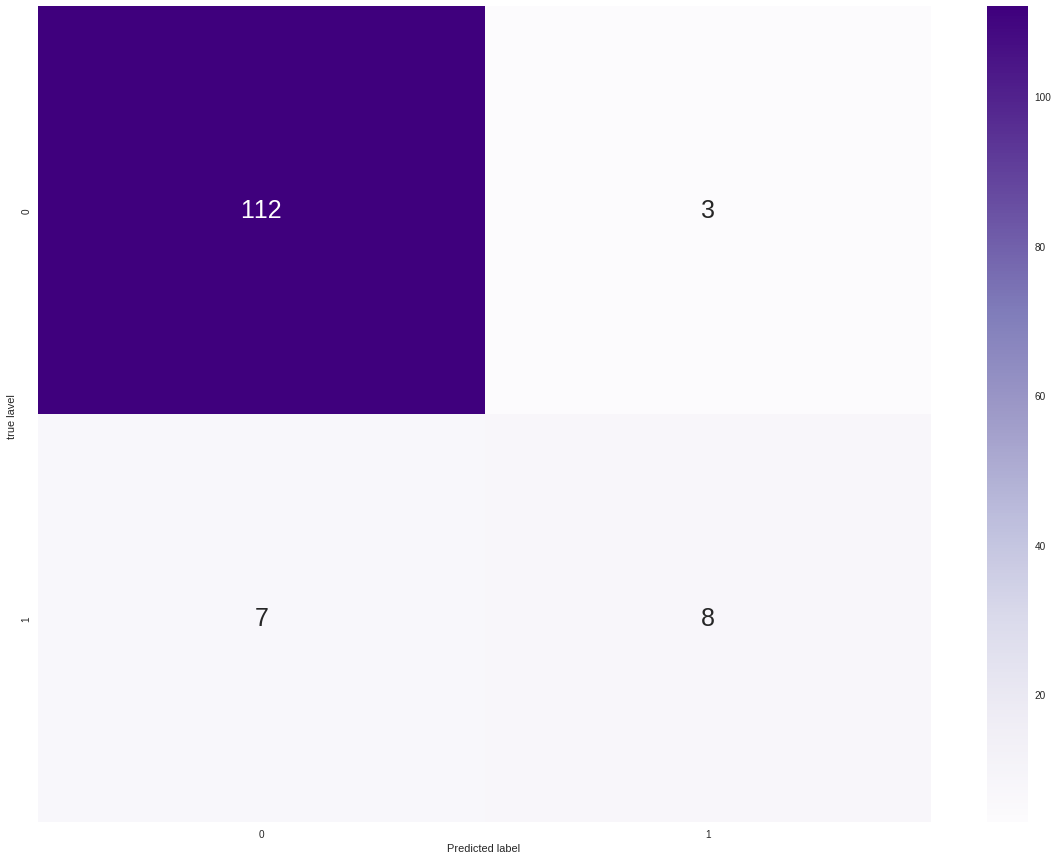

In [44]:
#Prediction label
y_predict = KNN_model.predict(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Confusion_Matrix, annot=True, fmt='g', cmap='Purples');
plt.xlabel('Predicted label ')
plt.ylabel('true lavel ')
plt.legend('confusion Matrix')


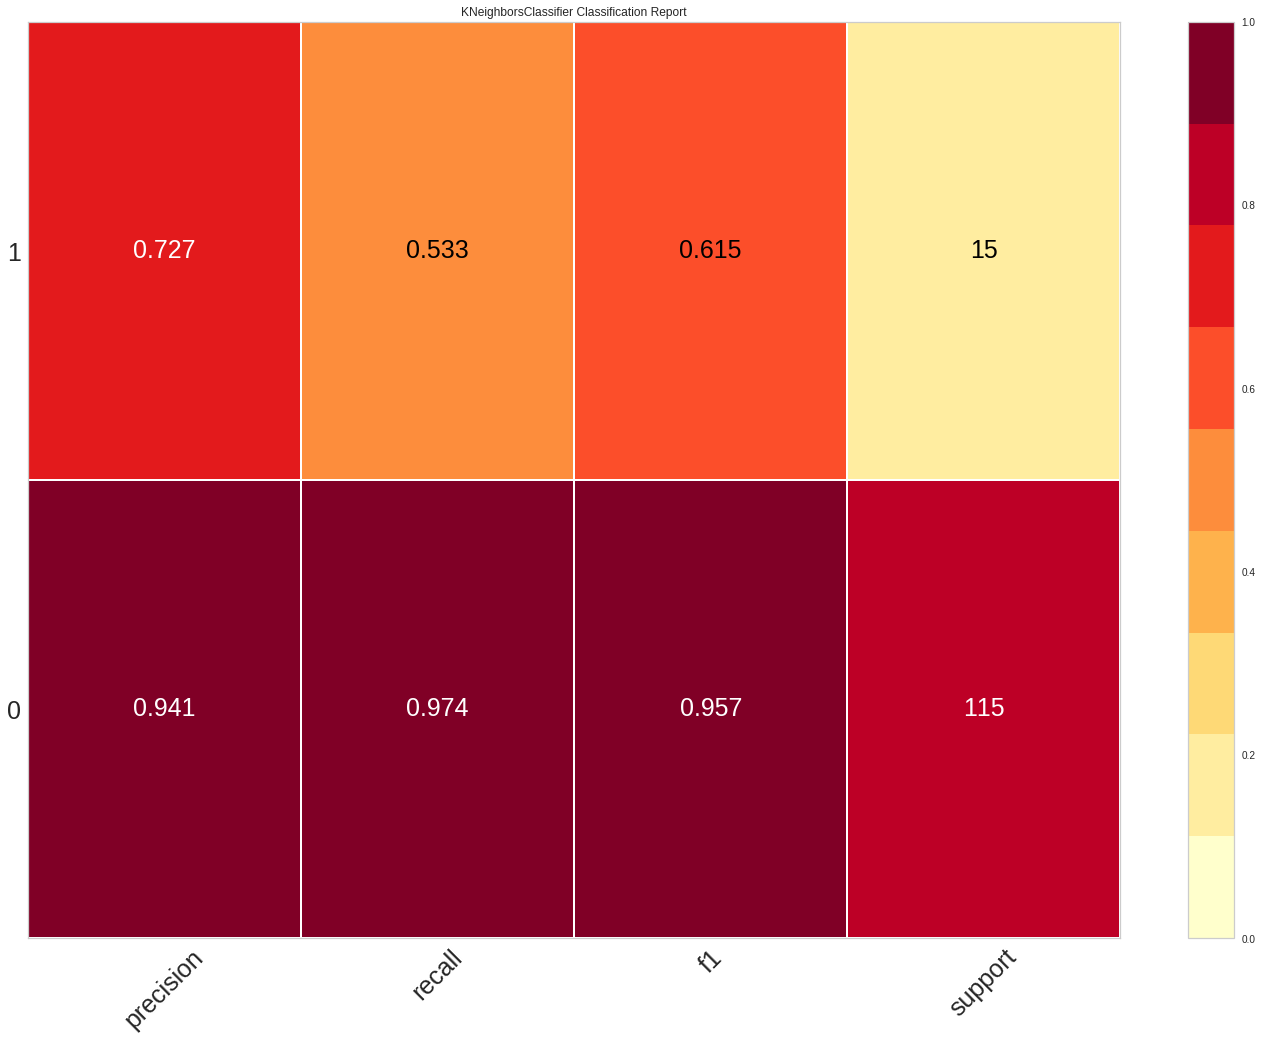

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [45]:
#calulate the precision and recall and f1-score .    
c = ['0' , '1']
vis1 = ClassificationReport(KNN_model, classes=c, support=True)
#fit the visualizer and the model
vis1.fit(x_train, y_train)  
#evaluate the model
vis1.score(x_test, y_test)
#show the figure       
vis1.show()               


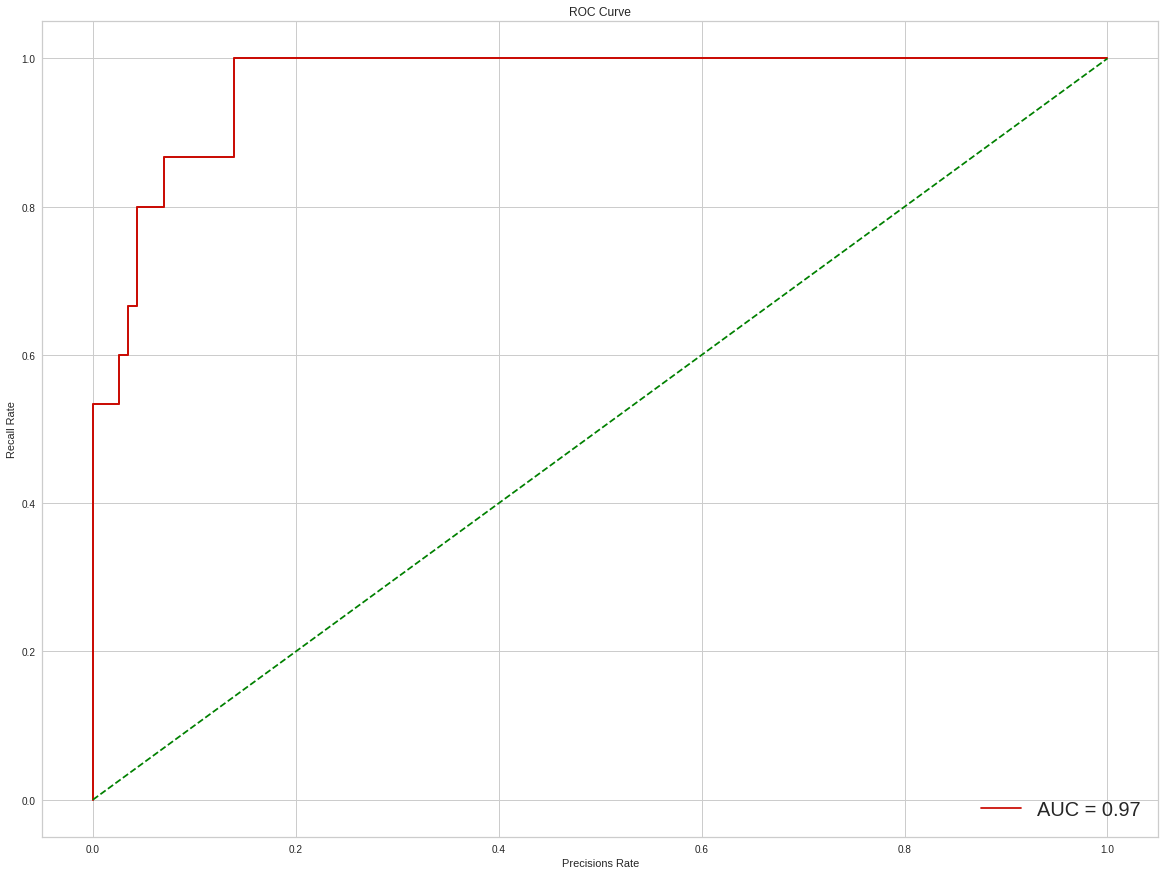

In [46]:
#plot roc and roc_auc curve for KNN classifier
knn_precisions, knn_recalls,knn_thresholds = roc_curve(y_test, KNN_model.predict_proba(x_test)[:,1])
ROC_aucccarcy1 = roc_auc_score(y_test, KNN_model.predict_proba(x_test)[:,1])
plt.plot(knn_precisions,knn_recalls,'r',label = 'AUC = %.2f' % ROC_aucccarcy1)
plt.plot(knn_precisions,knn_recalls, color='r', label = "")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Precisions Rate')
plt.ylabel('Recall Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop={'size':20}) 
plt.show()

## 2. Logistic Regression


In [47]:
#build logistic regression model 
log_model = LogisticRegression()


In [48]:
#grid search to find the best hyperparameters for Logistic Regression

GridSearch_classifier_log=GridSearchCV(log_model, param_grid= {'C':[0.001,.003,0.07,0.1,0.3,0.7,1.2,1,3,7,15, 1e5],'solver':['liblinear', 'sag', 'saga']},cv=10,n_jobs= -1,scoring = 'accuracy')
GridSearch_classifier_log.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.07, 0.1, 0.3, 0.7, 1.2, 1, 3, 7,
                               15, 100000.0],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [49]:
GridSearch_classifier_log.best_score_

0.9427249166975195

In [50]:
GridSearch_classifier_log.best_estimator_

LogisticRegression(C=0.3, solver='saga')

In [51]:
GridSearch_classifier_log.best_params_

{'C': 0.3, 'solver': 'saga'}

Text(0, 0.5, 'Weights')

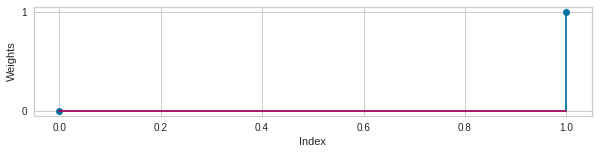

In [52]:
#train logistic regression model 
log_model = LogisticRegression(solver='saga', C=0.3,  random_state=3, max_iter = 1000)
#fit logistic regression model 
log_model.fit(x_train, np.ravel(y_train))
log_model
plt.figure(figsize=(10,2))                
plt.stem(c,use_line_collection=True);
plt.xlabel('Index')
plt.ylabel('Weights')

In [53]:
#Test the accuracy of model on training set
log_TrainScore= log_model.score(x_train, y_train)
log_TrainScore

0.9481582537517054

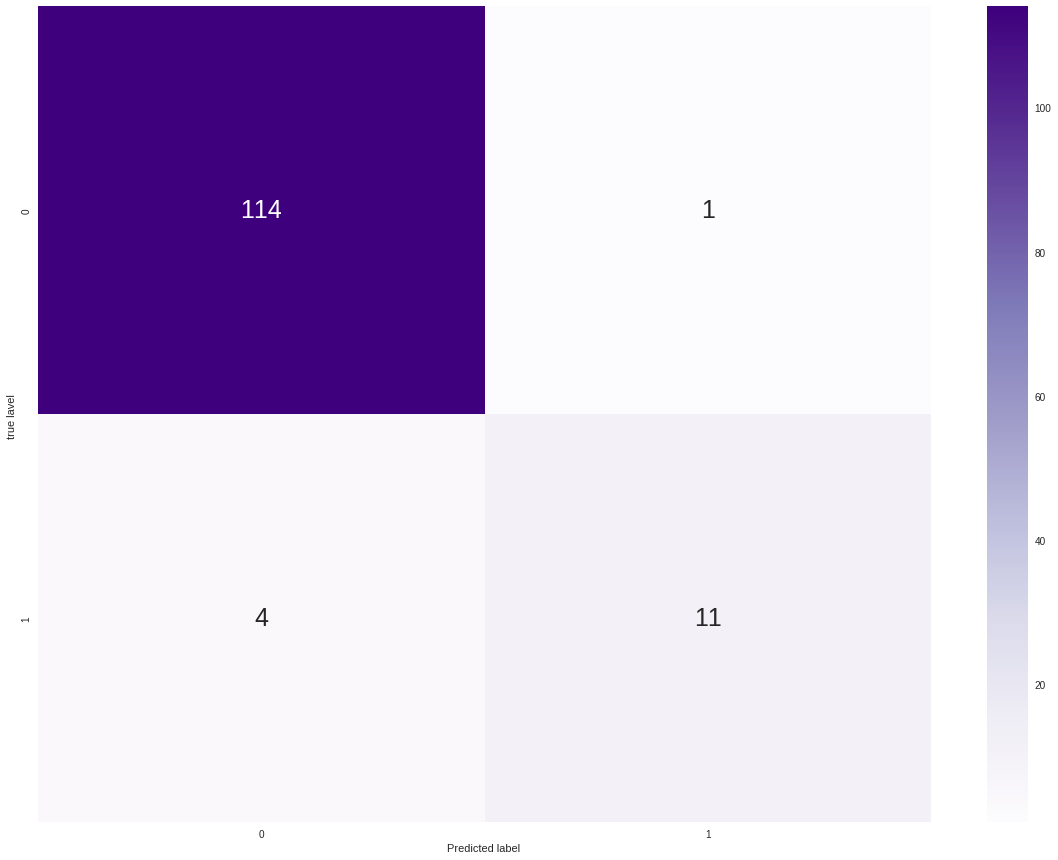

In [54]:
#Prediction label
y_predict = log_model.predict(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Confusion_Matrix, annot=True, fmt='g', cmap='Purples');
plt.xlabel('Predicted label ')
plt.ylabel('true lavel ')
plt.legend('confusion Matrix')


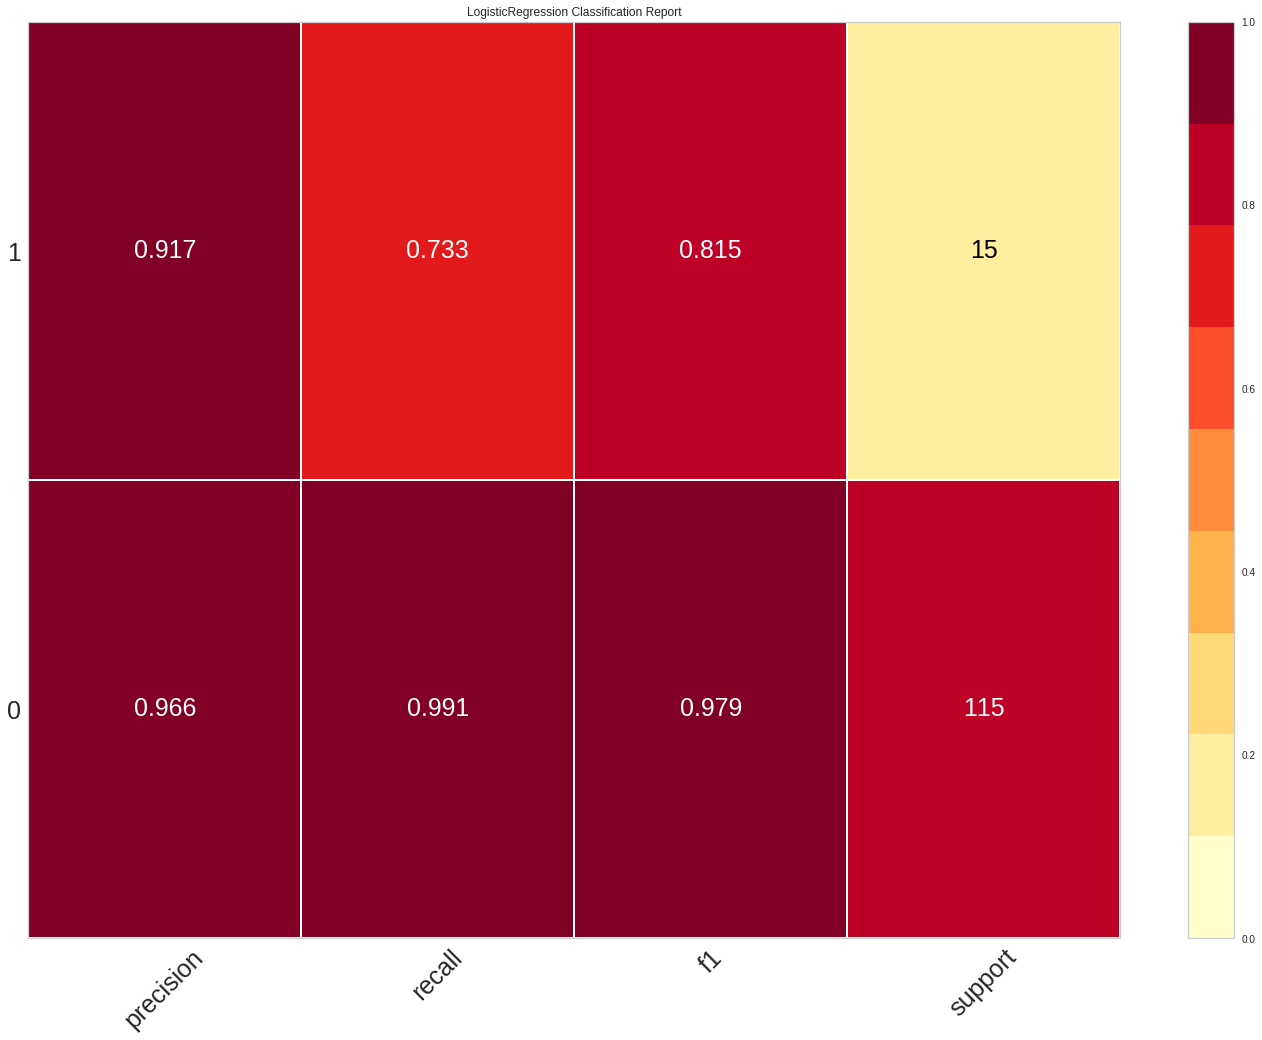

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [55]:
#calulate the precision and recall and f1-score .    
c = ['0' , '1']
vis2 = ClassificationReport(log_model, classes=c, support=True)
#fit the visualizer and the model
vis2.fit(x_train, y_train)  
#evaluate the model
vis2.score(x_test, y_test)
#show the figure       
vis2.show()               


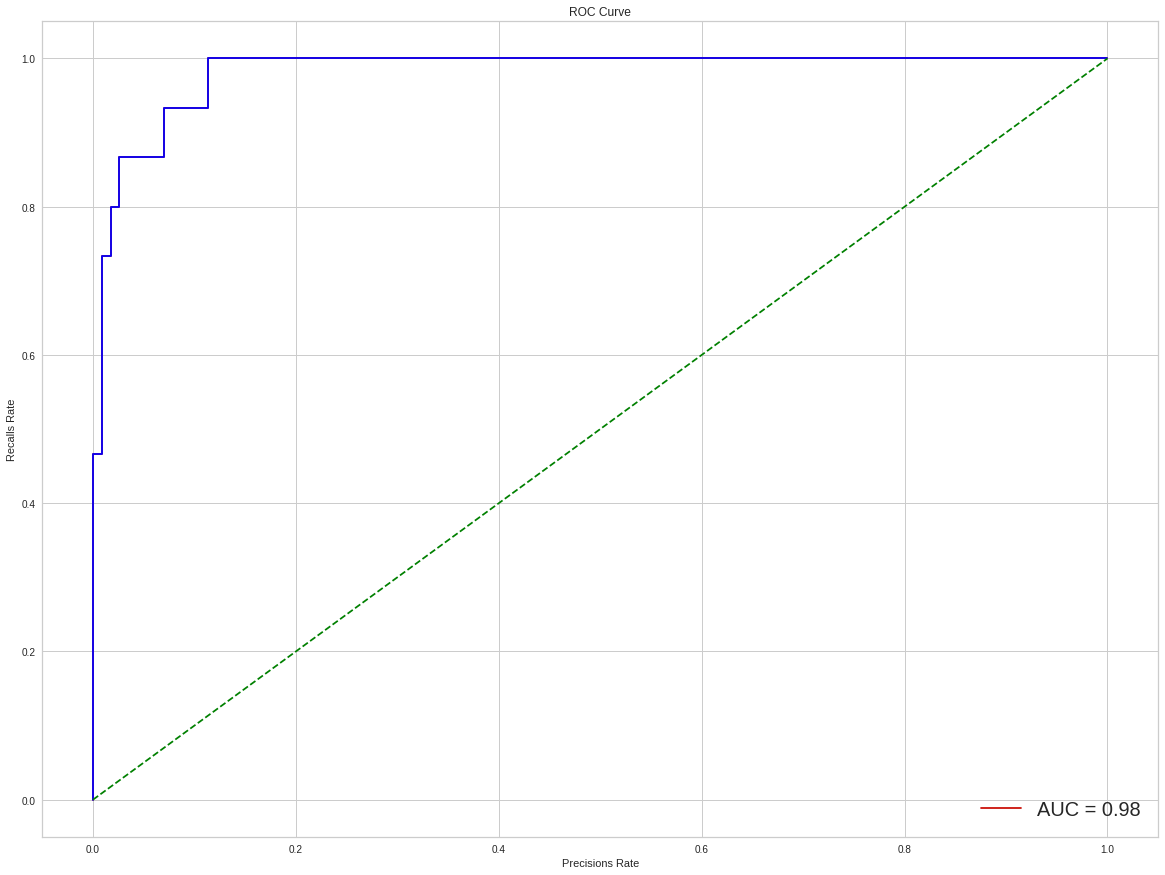

In [56]:
#plot roc and roc_auc curve for logistic regression
log_precisions,log_recalls, log_thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
ROC_aucccarcy2 = roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1])
plt.plot(log_precisions,log_recalls,'r',label = 'AUC = %.2f' % ROC_aucccarcy2)
plt.plot(log_precisions,log_recalls, color='blue', label = "")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Precisions Rate')
plt.ylabel('Recalls Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop={'size':20}) 
plt.show()

## 3. Naïve Bayes

In [57]:
#build Naïve Bayes classifier
gaussian_classifier = GaussianNB()

#grid search to find the best hyperparameters for gaussian classifier
GridSearch_classifier_N = GridSearchCV(gaussian_classifier,{'var_smoothing': np.logspace(0, -10, num=200)}, cv=5)

#train Naïve Bayes classifier
GridSearch_classifier_N.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.90735464e-01, 7.93409667e-01, 7.06718127e-01,
       6.29498899e-01, 5.60716994e-01, 4.99450512e-01, 4.44878283e-01,
       3.96268864e-01, 3.52970730e-01, 3.14403547e-01, 2.80050389e-01,
       2.49450814e-01, 2.22194686e-01, 1.97916687e-01, 1.76291412e-01,
       1.57029012e-01, 1.39871310e-01, 1.24...
       1.43145894e-09, 1.27505124e-09, 1.13573336e-09, 1.01163798e-09,
       9.01101825e-10, 8.02643352e-10, 7.14942899e-10, 6.36824994e-10,
       5.67242607e-10, 5.05263107e-10, 4.50055768e-10, 4.00880633e-10,
       3.57078596e-10, 3.18062569e-10, 2.83309610e-10, 2.52353917e-10,
       2.24780583e-10, 2.00220037e-10, 1.78343088e-10, 1.58856513e-10,
       1.41499130e-10, 1.26038293e-10, 1.12266777e-10, 1.00000000e-10])})

In [58]:
GridSearch_classifier_N.best_estimator_

GaussianNB(var_smoothing=0.7934096665797492)

In [59]:
GridSearch_classifier_N.best_score_

0.8731618674867206

In [60]:
GridSearch_classifier_N.best_params_

{'var_smoothing': 0.7934096665797492}

In [61]:
#train Naïve Bayes classifier with optimal hyperparameters
NAIVE_model = GaussianNB(var_smoothing=0.5607169938205457)
NAIVE_model.fit(x_train, y_train)

#test the accuracy of model 
train_score= NAIVE_model.score(x_train,y_train)
train_score


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8731241473396999

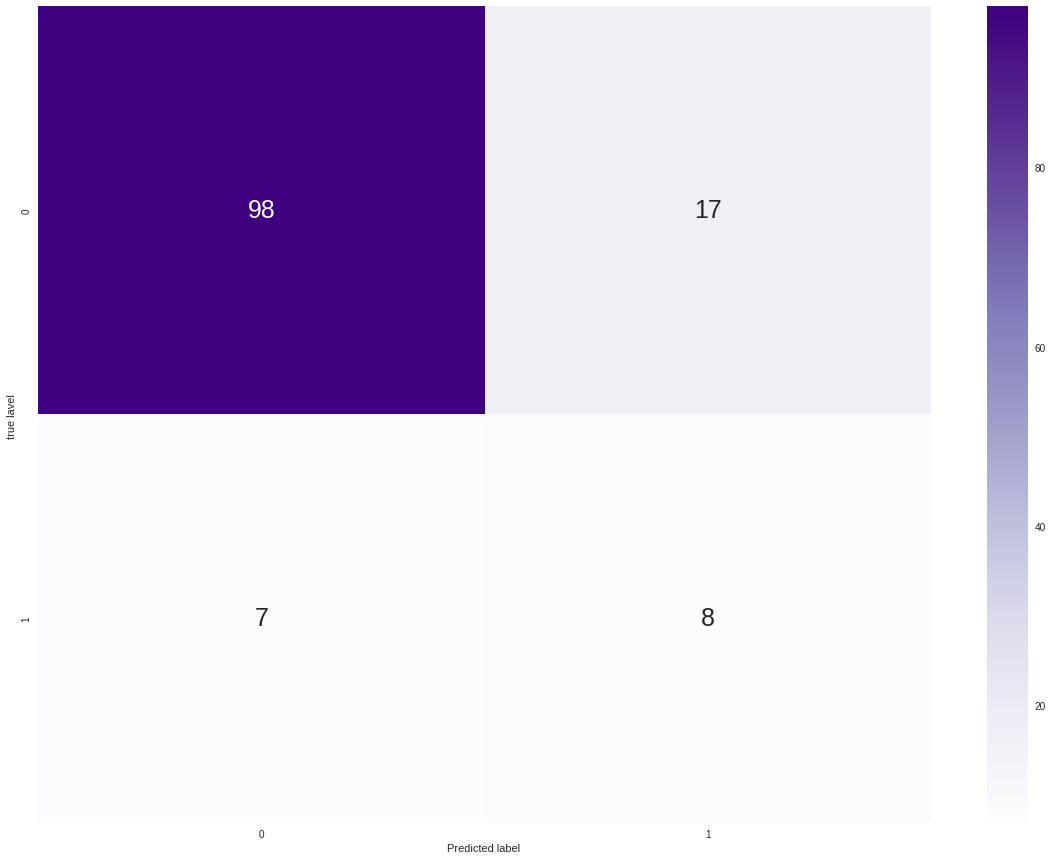

In [62]:
#Prediction label
y_predict = NAIVE_model.predict(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Confusion_Matrix, annot=True, fmt='g', cmap='Purples');
plt.xlabel('Predicted label ')
plt.ylabel('true lavel ')
plt.legend('confusion Matrix')

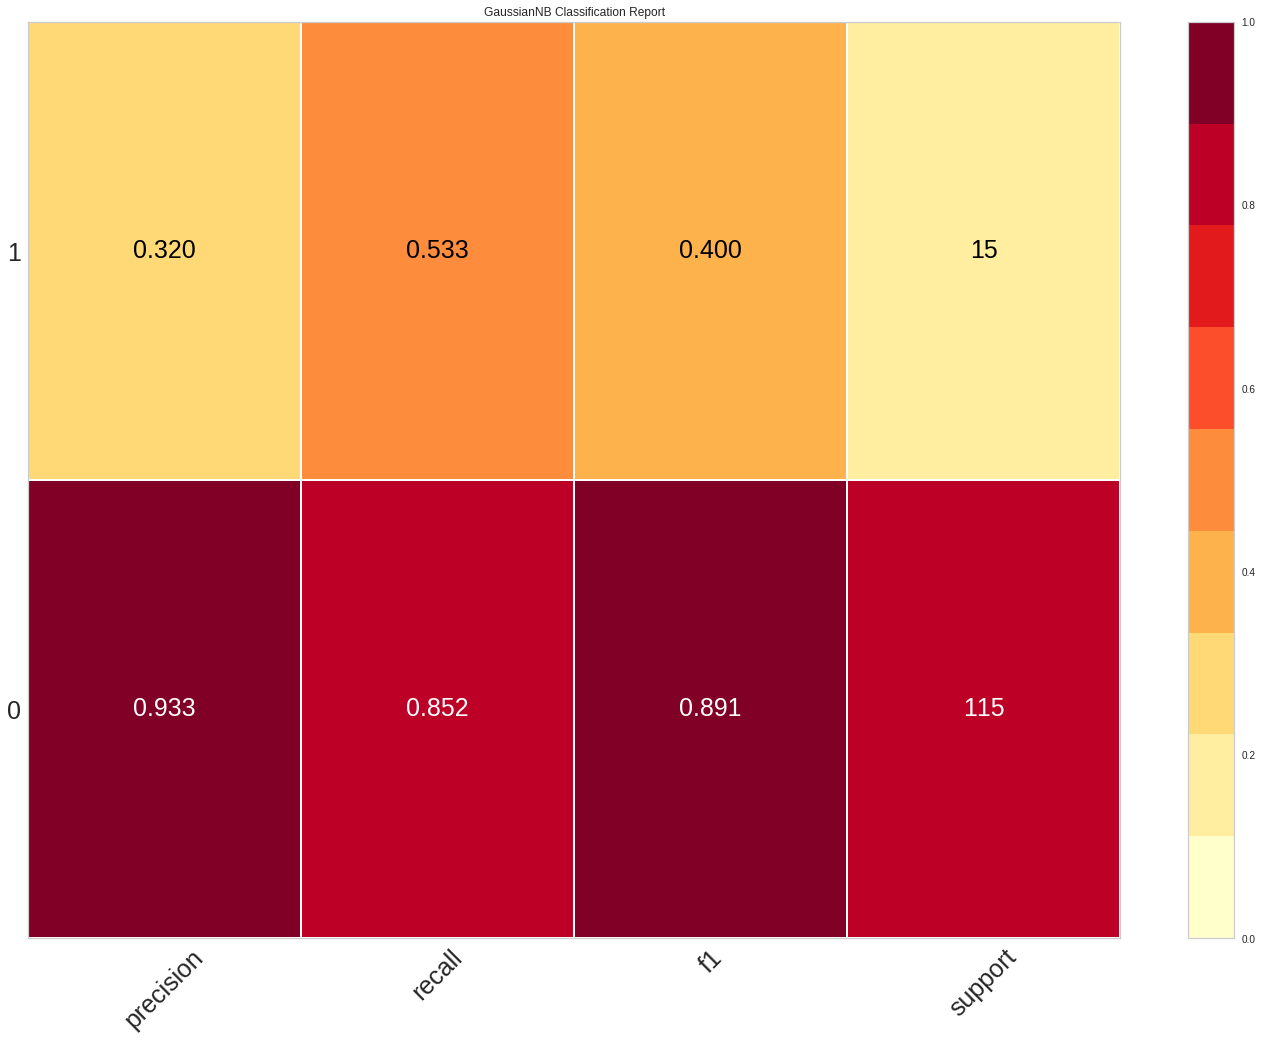

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [63]:
#calulate the precision and recall and f1-score .    
c = ['0' , '1']
vis3 = ClassificationReport(NAIVE_model, classes=c, support=True)
#fit the visualizer and the model
vis3.fit(x_train, y_train)  
#evaluate the model
vis3.score(x_test, y_test)
#show the figure       
vis3.show() 


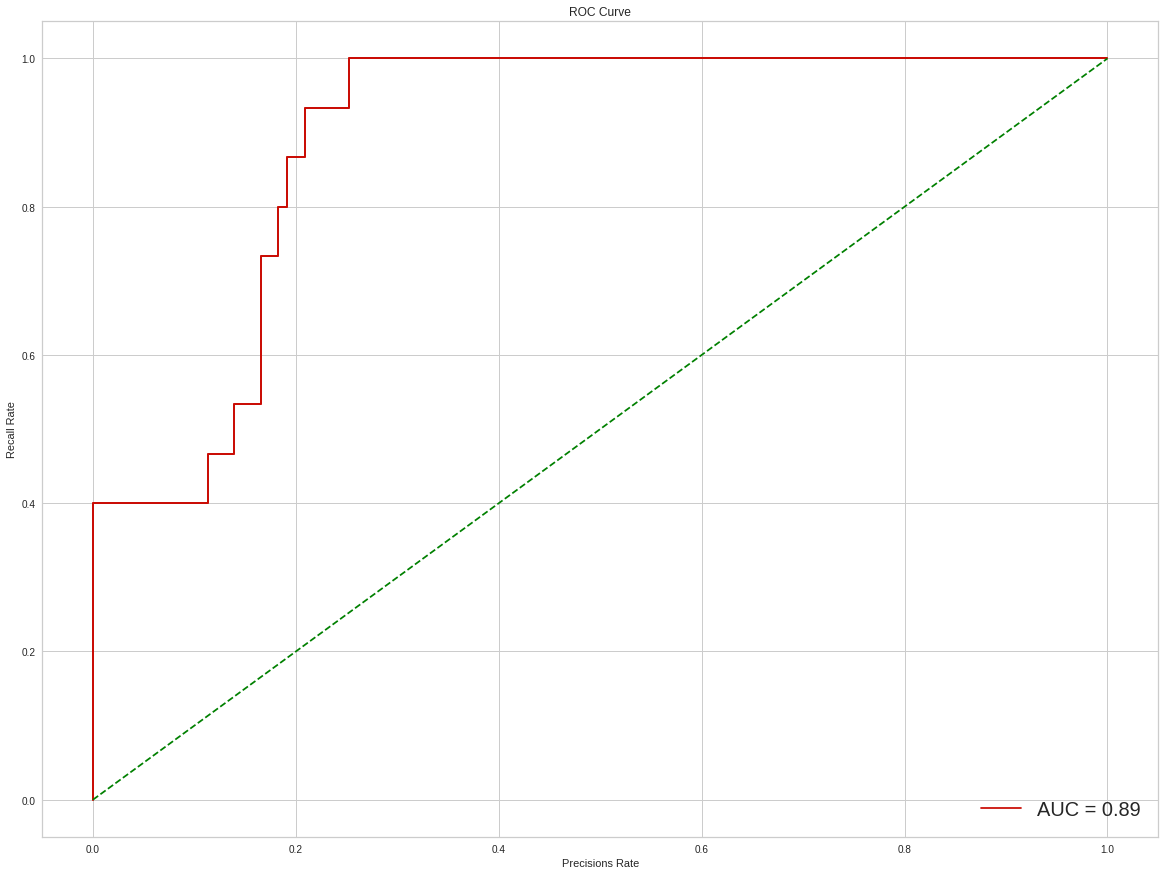

In [64]:
#plot roc and roc_auc curve for gaussian classifier
NAIVE_precisions, NAIVE_recalls, NAIVE_thresholds = roc_curve(y_test, NAIVE_model.predict_proba(x_test)[:,1])
ROC_aucccarcy3 = roc_auc_score(y_test, NAIVE_model.predict_proba(x_test)[:,1])
plt.plot(NAIVE_precisions,NAIVE_recalls,'r',label = 'AUC = %.2f' % ROC_aucccarcy3)
plt.plot(NAIVE_precisions,NAIVE_recalls, color='r', label = "")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Precisions Rate')
plt.ylabel('Recall Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop={'size':20}) 
plt.show()

## 4. Decision Trees


In [65]:
#Build decision tree classifier
tree_model = DecisionTreeClassifier()

#grid search to find the best hyperparameters for tree classifier
tree_paras ={'max_depth': [1, 3, 5, 15, 20],'min_samples_leaf': [10, 30, 40, 50, 100],'criterion': ["entropy", "gini"]}
GridSearch_classifier_tree = GridSearchCV(tree_model, tree_paras, cv=5,scoring = "accuracy")

#train tree classifier
GridSearch_classifier_tree.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 5, 15, 20],
                         'min_samples_leaf': [10, 30, 40, 50, 100]},
             scoring='accuracy')

In [66]:
GridSearch_classifier_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50)

In [67]:
GridSearch_classifier_tree.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 50}

In [68]:
GridSearch_classifier_tree.best_score_

0.9304631441617742

In [69]:
new_tree_model=DecisionTreeClassifier(criterion= "entropy", max_depth= 3 , min_samples_leaf= 50 , random_state= 3)
new_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50,
                       random_state=3)

In [70]:
#Test the accuracy of model on training set
tree_score=new_tree_model.score(x_train, y_train)
tree_score

0.9304229195088677

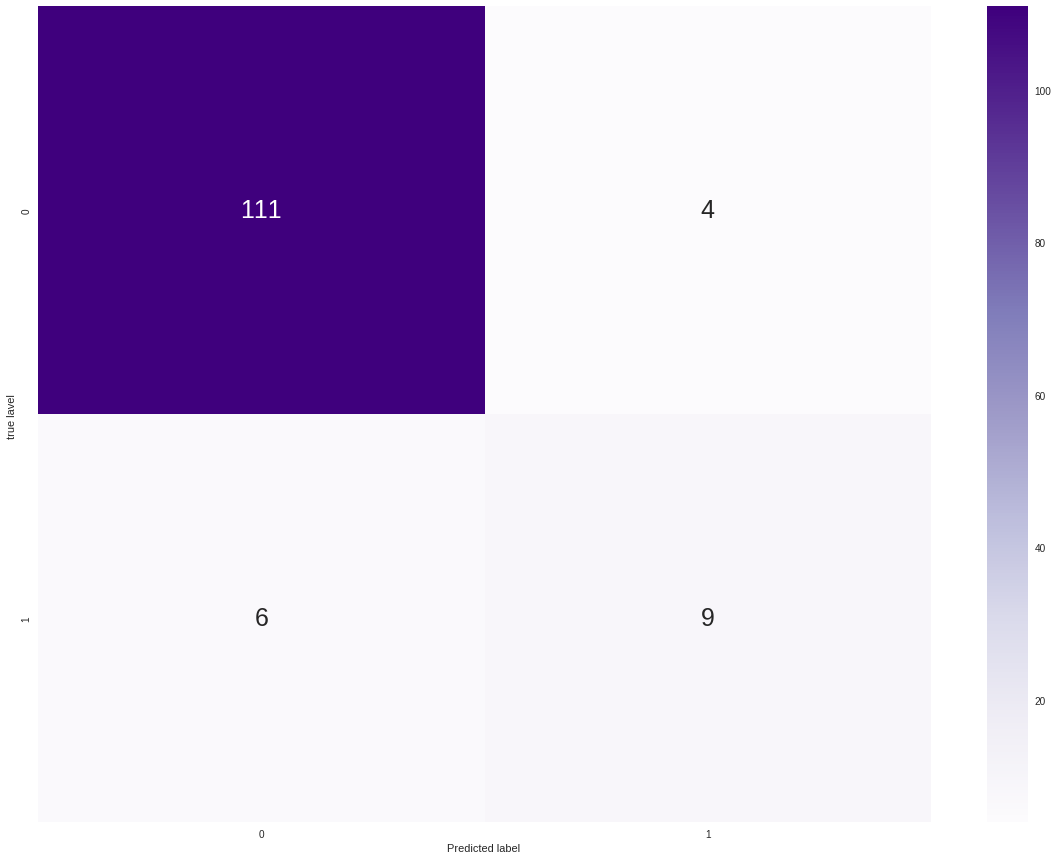

In [76]:
#Prediction label
y_predict = new_tree_model.predict(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Confusion_Matrix, annot=True, fmt='g', cmap='Purples');
plt.xlabel('Predicted label ')
plt.ylabel('true lavel ')
plt.legend('confusion Matrix')

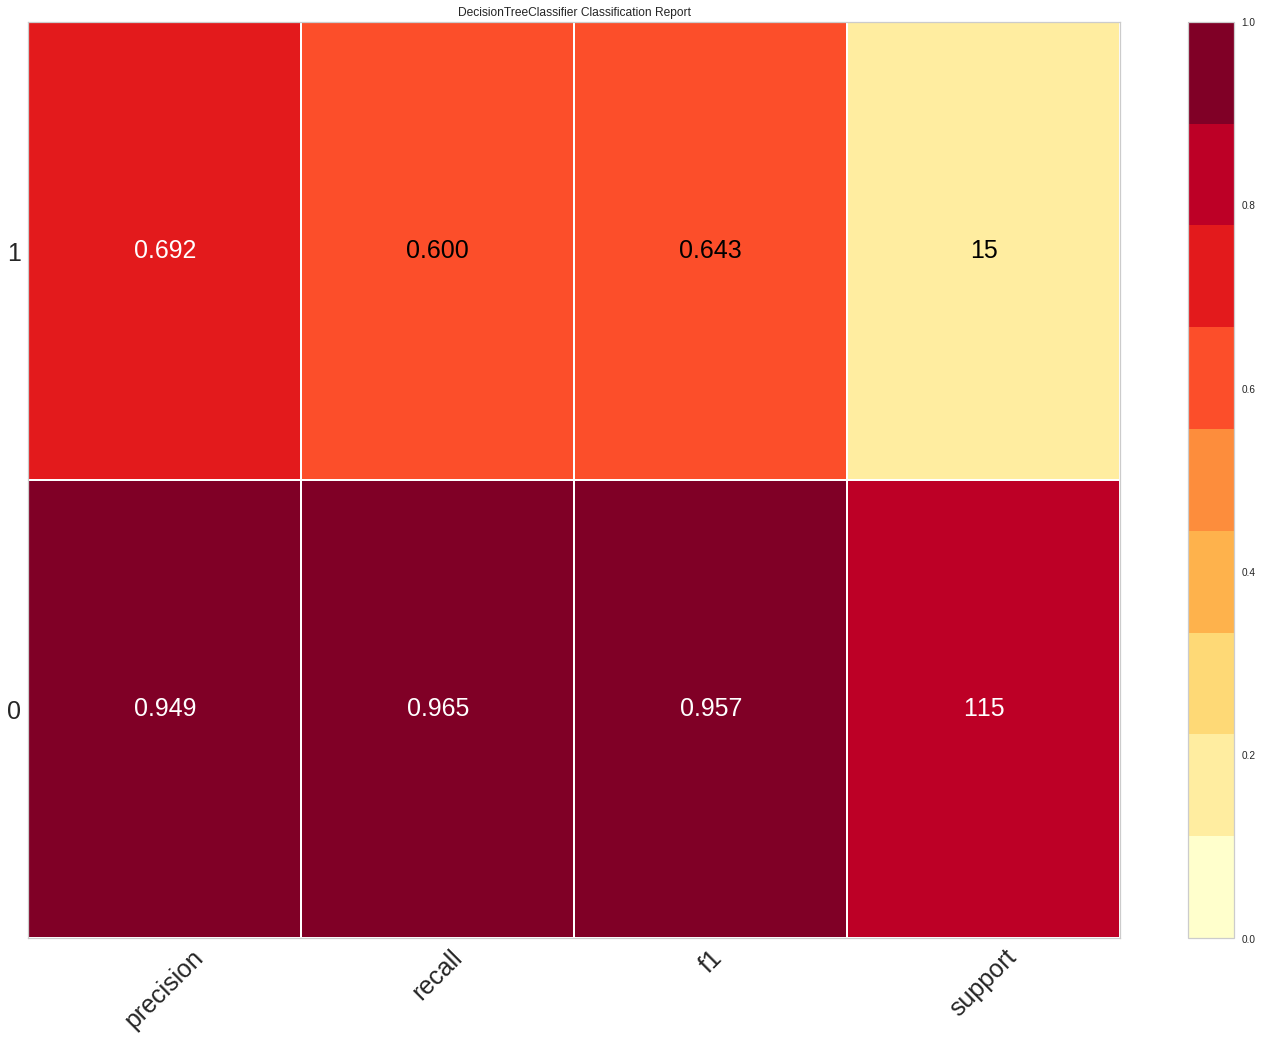

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [78]:
#calulate the precision and recall and f1-score .    
c = ['0' , '1']
vis4 = ClassificationReport(new_tree_model, classes=c, support=True)
#fit the visualizer and the model
vis4.fit(x_train, y_train)  
#evaluate the model
vis4.score(x_test, y_test)
#show the figure       
vis4.show()               

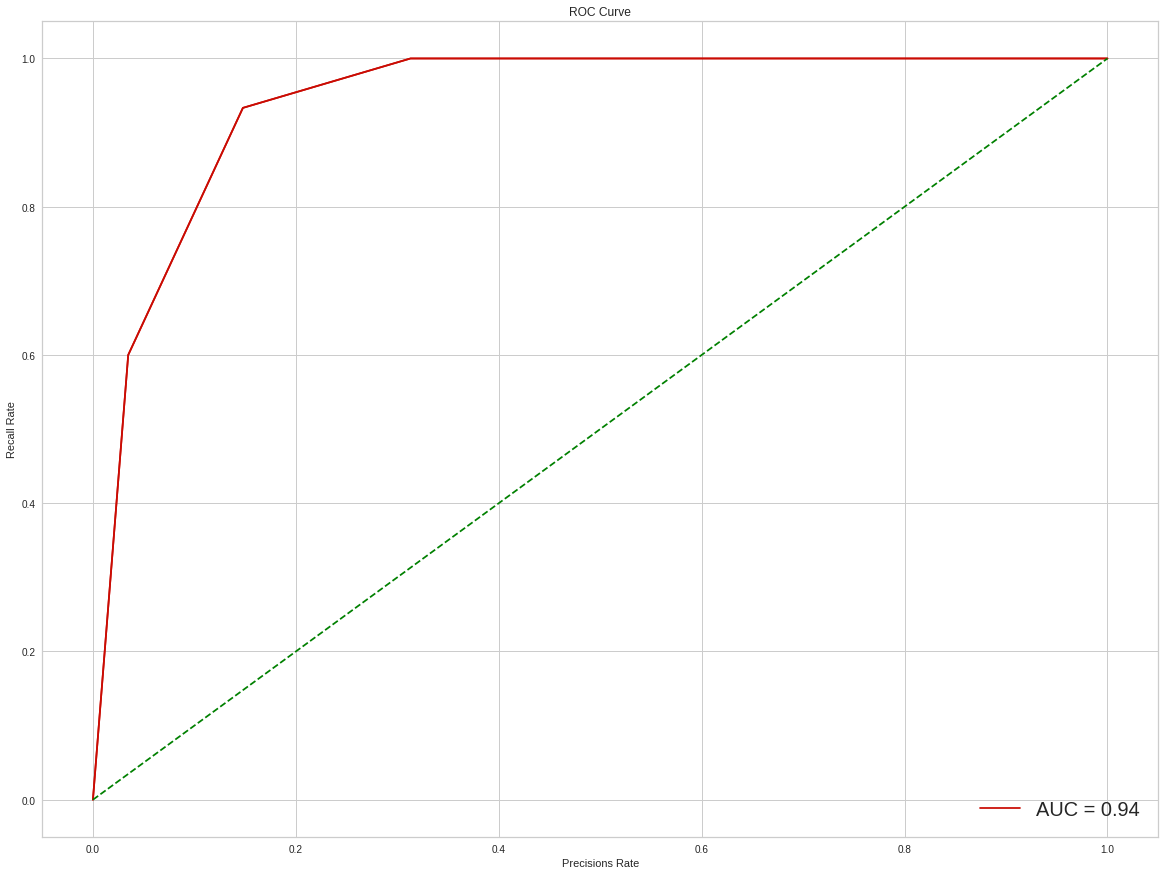

In [79]:
#plot roc and roc_auc curve for decison tree
tree_precisions, tree_recalls, tree_thresholds = roc_curve(y_test, new_tree_model.predict_proba(x_test)[:,1])
ROC_aucccarcy4 = roc_auc_score(y_test, new_tree_model.predict_proba(x_test)[:,1])
plt.plot(tree_precisions,tree_recalls,'r',label = 'AUC = %.2f' % ROC_aucccarcy4)
plt.plot(tree_precisions,tree_recalls, color='r', label = "")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Precisions Rate')
plt.ylabel('Recall Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop={'size':20}) 
plt.show()

## 5. Support Vector Machines 


In [80]:
#build svm classifier
SVM_classifier = svm.SVC(random_state=5, probability=True)

#grid search to find the best hyperparameters for Naïve Bayes classifier
GridSearch_classifier_SVM = GridSearchCV(SVM_classifier,{'C': [0.001,0.005, 0.01,0.05, 0.1],'kernel': ['linear', 'rbf', 'poly'],'degree': [2,3,4],'gamma': [0.1, 0.5]}, cv=5,scoring = 'accuracy')

#train Naïve Bayes classifier
GridSearch_classifier_SVM.fit(x_train, np.ravel( y_train))

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=5),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'degree': [2, 3, 4], 'gamma': [0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [81]:
GridSearch_classifier_SVM.best_estimator_

SVC(C=0.05, gamma=0.5, kernel='poly', probability=True, random_state=5)

In [82]:
GridSearch_classifier_SVM.best_params_

{'C': 0.05, 'degree': 3, 'gamma': 0.5, 'kernel': 'poly'}

In [83]:
GridSearch_classifier_SVM.best_score_

0.9645140247879974

In [84]:
#train the SVM model with optimal hyperparameters
SVM_model = svm.SVC(C=0.05, degree= 3 , gamma=0.5, kernel='poly', probability=True, random_state=5)
SVM_model.fit( x_train,np.ravel( y_train) )

#test the accuracy of model 
train_score_SVM= SVM_model.score(x_train,y_train)
train_score_SVM


0.9863574351978172

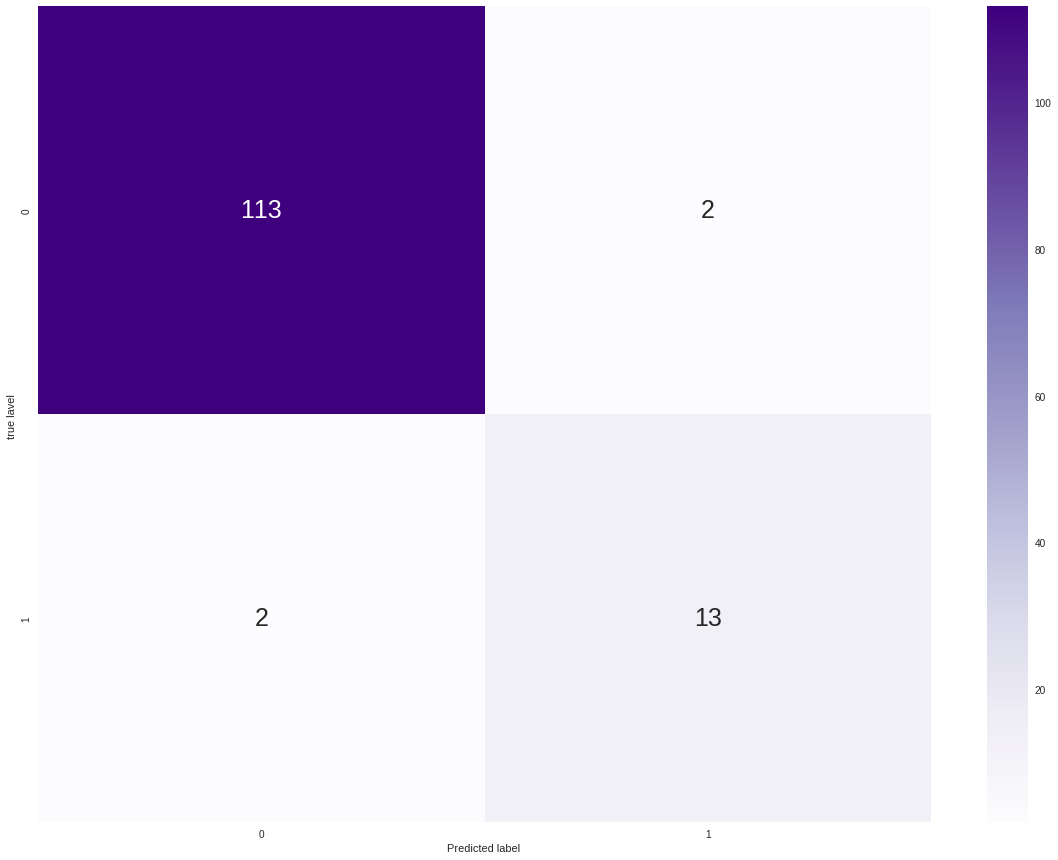

In [85]:
#Prediction label
y_predict = SVM_model.predict(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Confusion_Matrix, annot=True, fmt='g', cmap='Purples');
plt.xlabel('Predicted label ')
plt.ylabel('true lavel ')
plt.legend('confusion Matrix')

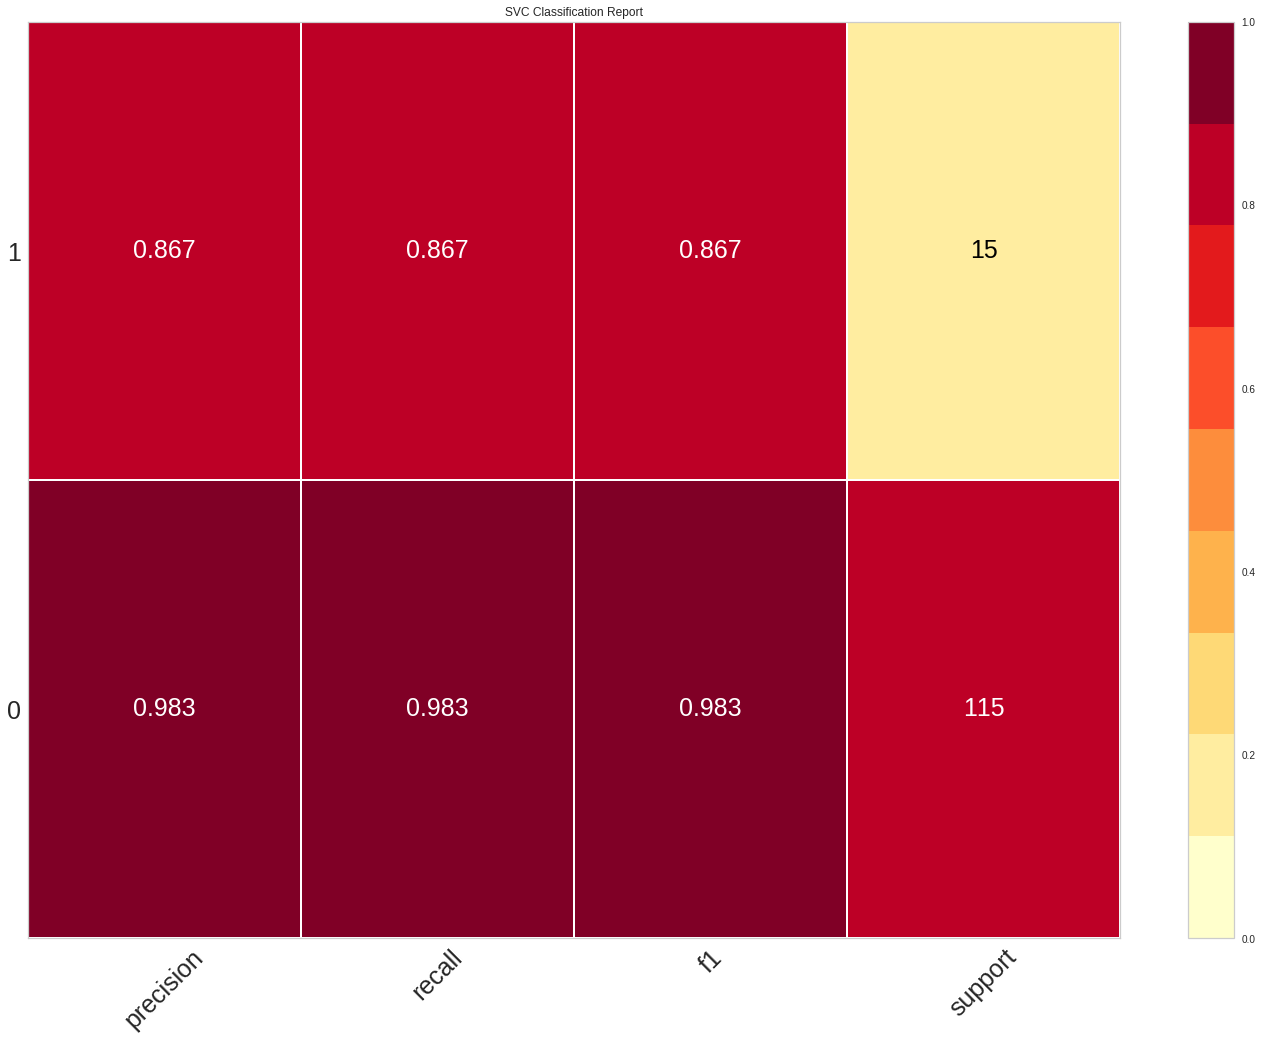

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [86]:
#calulate the precision and recall and f1-score .    
c = ['0' , '1']
vis5 = ClassificationReport(SVM_model, classes=c, support=True)
#fit the visualizer and the model
vis5.fit(x_train, y_train)  
#evaluate the model
vis5.score(x_test, y_test)
#show the figure       
vis5.show()               

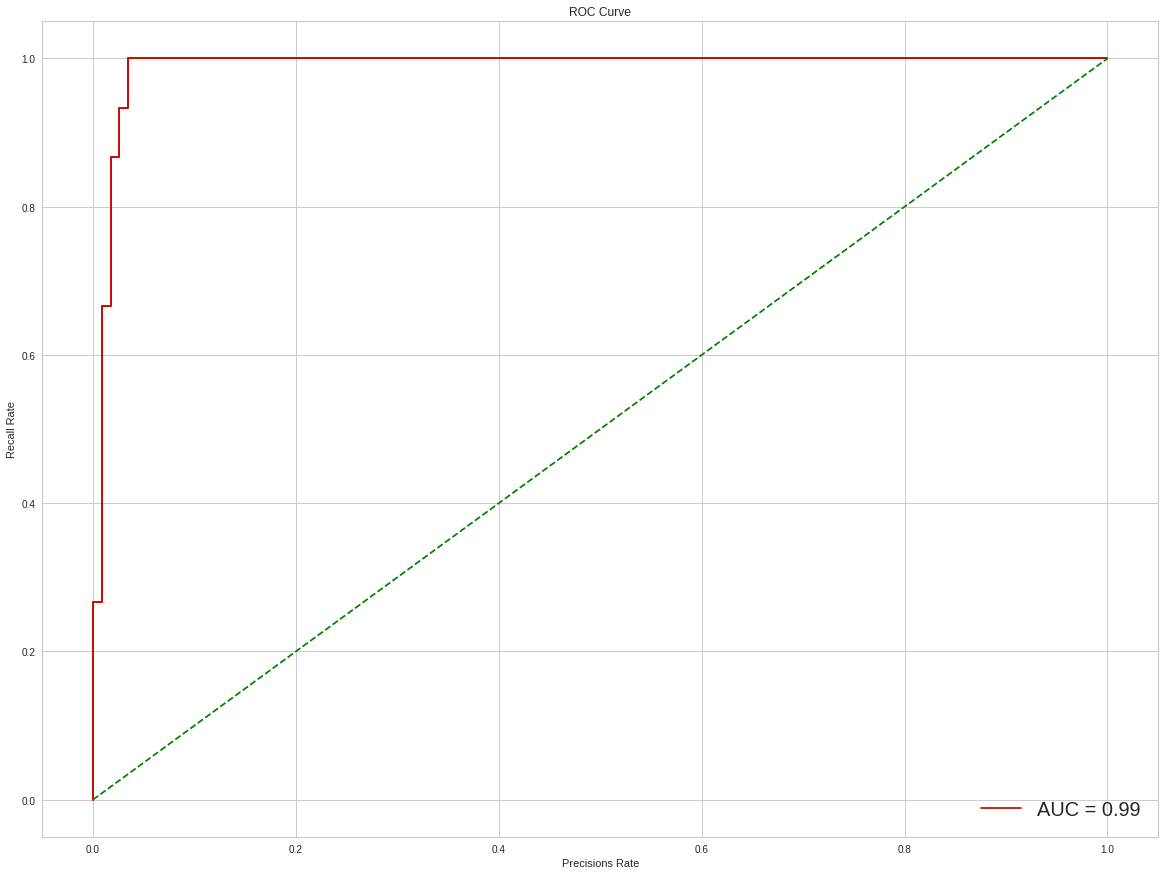

In [87]:
#plot roc and roc_auc curve for svm
svm_precisions, svm_recalls, svm_thresholds = roc_curve(y_test, SVM_model.predict_proba(x_test)[:,1])
ROC_aucccarcy5 = roc_auc_score(y_test, SVM_model.predict_proba(x_test)[:,1])
plt.plot(svm_precisions,svm_recalls,'r' ,label = 'AUC = %.2f' % ROC_aucccarcy5)
plt.plot(svm_precisions,svm_recalls, color='r', label = "")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Precisions Rate')
plt.ylabel('Recall Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop={'size':20}) 
plt.show()

## **comparison between models**

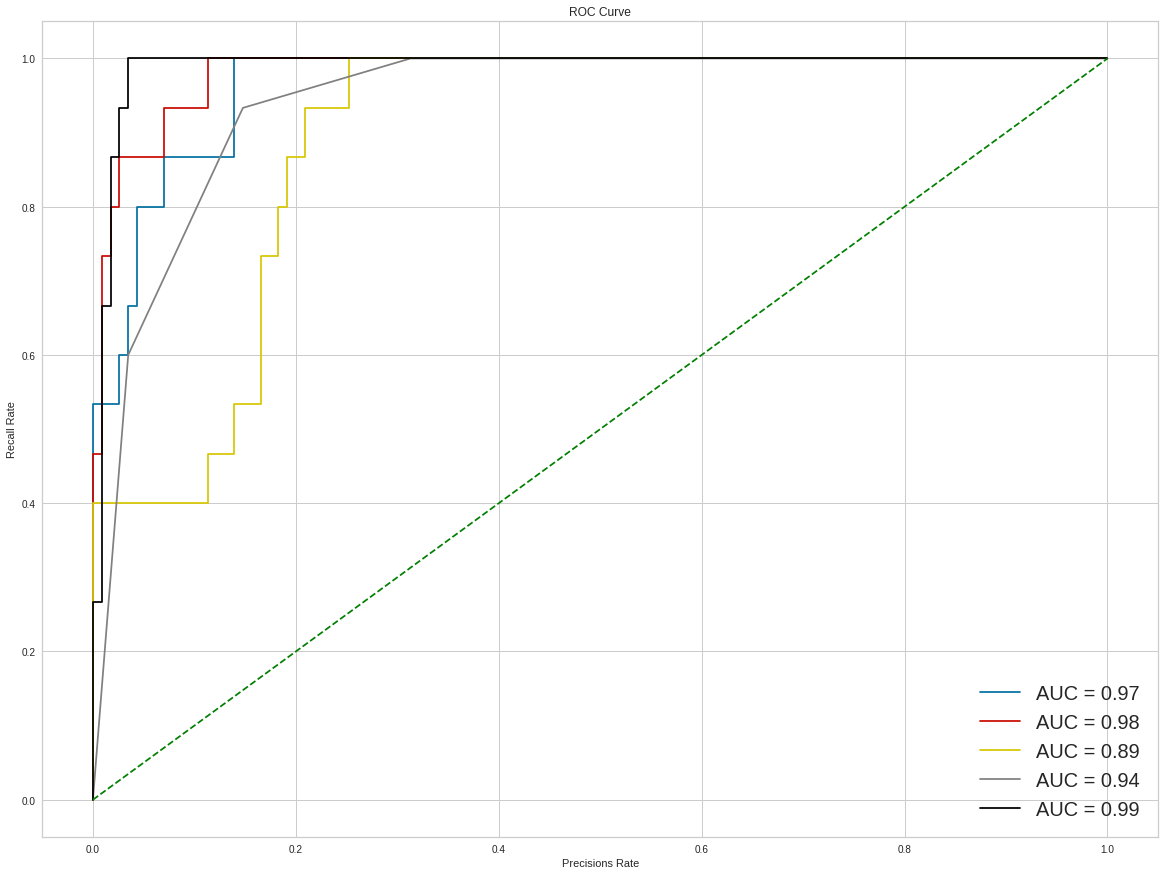

In [88]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

#plot roc and roc_auc curve for all classifier to comapre between them.
plt.plot(knn_precisions,knn_recalls,'b',label = 'AUC = %.2f' % ROC_aucccarcy1)
plt.plot(log_precisions,log_recalls,'r',label = 'AUC = %.2f' % ROC_aucccarcy2)
plt.plot(NAIVE_precisions,NAIVE_recalls,'y',label = 'AUC = %.2f' % ROC_aucccarcy3)
plt.plot(tree_precisions,tree_recalls,'gray',label = 'AUC = %.2f' % ROC_aucccarcy4)
plt.plot(svm_precisions,svm_recalls,'black' ,label = 'AUC = %.2f' % ROC_aucccarcy5)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Precisions Rate')
plt.ylabel('Recall Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop={'size':20}) 
plt.show()
